In [8]:
%matplotlib inline
import numpy as np
from scipy.signal import hilbert, chirp
import matplotlib.pyplot as plt

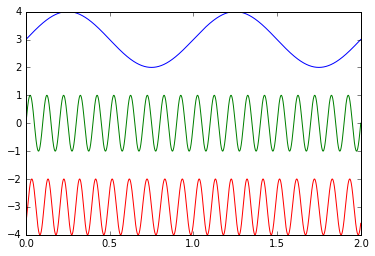

In [46]:
# Define the setup
fCarrier = 10
fAudio = 1
fs = 10000
timeEnd = 1
time = np.linspace(0, 2, fs * timeEnd)

# Create the signals
carrier = np.sin(2*np.pi*fCarrier*time)
audio = np.sin(2*np.pi*fAudio*time)
audioInt = -np.cos(2*np.pi*fAudio*time)
# audioInt = audio
freqMod = np.sin(2*np.pi*fCarrier*time + 2*np.pi*audioInt)

# Plot the signals
plt.plot(time,audio+3)
plt.plot(time,carrier)
plt.plot(time,freqMod-3)
plt.show()

# FM demodulator

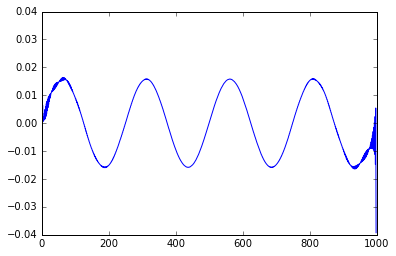

In [66]:
# Calculate the complex vector between two adjacent data points
analytic_signal = hilbert(freqMod)
analytic_signal = analytic_signal * np.exp(-2*np.pi*fCarrier*time*1j); # complex mixing
vectorDiff = analytic_signal[1:] * np.conjugate(analytic_signal[:-1])

# Record the angle of the complex difference vectors
tmp = np.angle(vectorDiff)
# tmp = 10/1 * tmp
# plt.plot(freqMod)
plt.plot(tmp)

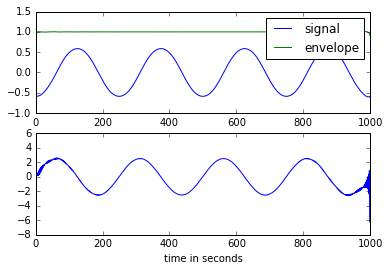

In [65]:
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(analytic_signal.real, label='signal')
ax0.plot(amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(instantaneous_frequency)
ax1.set_xlabel("time in seconds")

# Chirp signal

(0.0, 120.0)

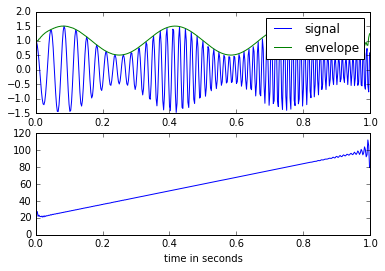

In [10]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

# Carrier

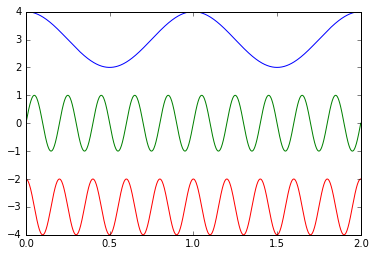

0.432581848233


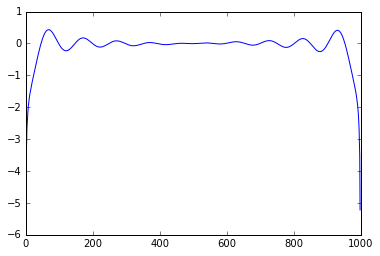

In [158]:
# Import the plotting library
from matplotlib import pyplot as plot
import scipy.signal
import numpy as np

# Define the setup
fCarrier = 5;
fAudio = 1;
fs = 1000;
timeEnd = 1;
time = np.linspace(0,2,fs*timeEnd);

devv = 0.1
fdev = (2*np.pi*devv)/fs

import common.cordic
loom = CORDIC()

# Create the signals
carrier = np.sin(2*np.pi*fCarrier*time);
# audio = np.sin(2*np.pi*fAudio*time);
# audioInt = -np.cos(2*np.pi*fAudio*time);
# freqMod = np.sin(2*np.pi*fCarrier*time + 2*np.pi*fdev*audioInt);
audio = np.cos(2*np.pi*fAudio*time);
freqMod = np.cos(2*np.pi*fCarrier*time - fdev*audio);
plt.plot(time,audio+3)
plt.plot(time,carrier)
plt.plot(time,freqMod-3)
plt.show()

# Downconvert
analyticSignal = scipy.signal.hilbert(freqMod); # wikipedia analytic signal
baseband = analyticSignal * np.exp(-2*np.pi*fCarrier*time*1j); # complex mixing
audioDemod = np.angle( baseband[1::1] * np.conjugate(baseband[0:-1:1]) ); # fm d

# plt.plot(10*audioDemod)
# plt.plot(13*audioDemod)

gain = 1/fdev
# coef = fs/(2*np.pi*fsk_deviation_hz/8)
# coef = 1/(fdev * np.pi * 2)
plt.plot(gain*audioDemod)
print(max(gain*audioDemod))